# 2022 NZMSA Data Science Submission.

In [3]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [4]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [5]:
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


In [7]:
for name in dataset.columns[2:-1]:
    print(f"Column {name}")
    print(f"\tAverage: {dataset[name].mean()}")
    print(f"\tStandard Deviation: {dataset[name].std()}")
    print(f"\t10th and 90th percentile range: {dataset[name].quantile(q=0.9) - dataset[name].quantile(q=0.1)}")
    print(f"\t25th and 75th percentile range: {dataset[name].quantile(q=0.75) - dataset[name].quantile(q=0.25)}")
    

Column tmpc
	Average: 15.81150292251008
	Standard Deviation: 4.235196864334494
	10th and 90th percentile range: 10.0
	25th and 75th percentile range: 6.0
Column dwpc
	Average: 12.115771909180348
	Standard Deviation: 3.7380046159637614
	10th and 90th percentile range: 10.0
	25th and 75th percentile range: 6.0
Column relh
	Average: 79.7823072987557
	Standard Deviation: 12.562199242950072
	10th and 90th percentile range: 31.14
	25th and 75th percentile range: 16.730000000000004
Column sknt
	Average: 8.919029159916686
	Standard Deviation: 5.348379356342449
	10th and 90th percentile range: 13.0
	25th and 75th percentile range: 7.0
Column gust
	Average: 30.962593516209477
	Standard Deviation: 6.319509758218393
	10th and 90th percentile range: 15.0
	25th and 75th percentile range: 8.0


<AxesSubplot:>

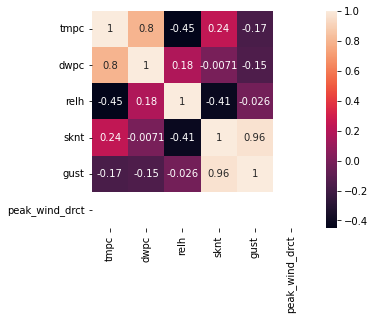

In [8]:
sns.heatmap(dataset.corr(), annot=True, square=True)

C:\Users\gqf12\AppData\Local\Temp\ipykernel_668\139544169.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


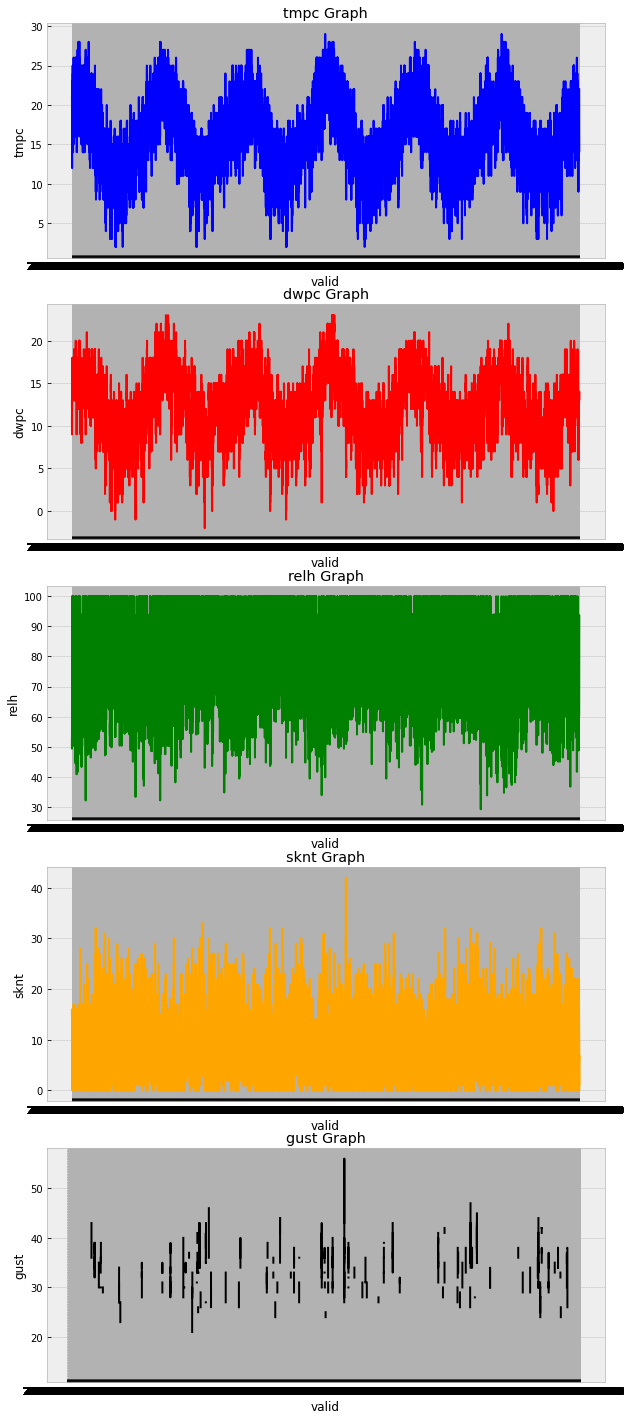

In [7]:

plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

ax1.plot(dataset["valid"], dataset["tmpc"], color="blue")
ax1.set_title("tmpc Graph")
ax1.set_xlabel("valid")
ax1.set_ylabel("tmpc")

ax2.plot(dataset["valid"], dataset["dwpc"], color="red")
ax2.set_title("dwpc Graph")
ax2.set_xlabel("valid")
ax2.set_ylabel("dwpc")

ax3.plot(dataset["valid"], dataset["relh"], color="green")
ax3.set_title("relh Graph")
ax3.set_xlabel("valid")
ax3.set_ylabel("relh")

ax4.plot(dataset["valid"], dataset["sknt"], color="orange")
ax4.set_title("sknt Graph")
ax4.set_xlabel("valid")
ax4.set_ylabel("sknt")

ax5.plot(dataset["valid"], dataset["gust"], color="black")
ax5.set_title("gust Graph")
ax5.set_xlabel("valid")
ax5.set_ylabel("gust")

fig.set_size_inches(10,25)

fig.show()

In [9]:
dataset[" station"].value_counts()

NZAA    103713
Name:  station, dtype: int64

### Comments
The values of station column are all "NZAA". Many missing value in columns of gust and peak_wind_drct. So remove these two columns. Temperature of the environment in celsius and temperature of the dew point in the environment in celsius are correlated with 80 percent confidence.

# Data Processing

In [33]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html
dataset = pd.read_csv("weather-data.csv")
dataset.drop(columns=[" station", "peak_wind_drct", "gust"], inplace=True)
dataset = dataset.dropna(axis=0, how="any")
dataset.head()

,valid,tmpc,dwpc,relh,sknt
0,2015-01-01 00:00,21.0,11.0,52.77,15.0
1,2015-01-01 00:30,21.0,10.0,49.37,16.0
2,2015-01-01 01:00,21.0,12.0,56.38,16.0
3,2015-01-01 01:30,21.0,13.0,60.21,16.0
4,2015-01-01 02:00,21.0,12.0,56.38,16.0


In [43]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(pd.to_datetime(dataset["valid"]), (dataset["tmpc"] - dataset["tmpc"].mean()) / dataset["tmpc"].std(), test_size=0.2)

In this section, I dropped the peak_wind_drct and gust columns because they had too many missing values. And the station column had only one value, therefore should not be used. Then, removed rows with any empty values for model training. Finally, randomly split the train and test set with ratio of 0.8, where x is time, and y is normalized tmpc, because tmpc is periodic.

# Data Modelling

In [ ]:
pip install prophet

In [44]:
from prophet import Prophet
model = Prophet()
model.fit(pd.DataFrame(data={"ds": trainX, "y":trainY}))

23:19:17 - cmdstanpy - INFO - Chain [1] start processing
23:20:15 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
testDataOrdered = pd.DataFrame(data={"ds" : testX, "y": testY}).sort_values(by="ds")
forecast_Y = model.predict(testDataOrdered)
forecast_Y.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 02:00:00,0.069886,0.738085,1.990793,0.069886,0.069886,1.306664,1.306664,1.306664,0.656390,...,-0.010815,-0.010815,-0.010815,0.661089,0.661089,0.661089,0.0,0.0,0.0,1.376550
1,2015-01-01 04:30:00,0.069770,0.542202,1.830297,0.069770,0.069770,1.129333,1.129333,1.129333,0.475318,...,-0.008878,-0.008878,-0.008878,0.662893,0.662893,0.662893,0.0,0.0,0.0,1.199103
2,2015-01-01 06:00:00,0.069701,0.314697,1.530419,0.069701,0.069701,0.860525,0.860525,0.860525,0.204552,...,-0.008021,-0.008021,-0.008021,0.663994,0.663994,0.663994,0.0,0.0,0.0,0.930226
3,2015-01-01 09:30:00,0.069539,-0.050158,1.174042,0.069539,0.069539,0.470168,0.470168,0.470168,-0.189417,...,-0.007034,-0.007034,-0.007034,0.666618,0.666618,0.666618,0.0,0.0,0.0,0.539706
4,2015-01-01 12:30:00,0.069400,-0.226293,1.009794,0.069400,0.069400,0.316534,0.316534,0.316534,-0.345041,...,-0.007354,-0.007354,-0.007354,0.668929,0.668929,0.668929,0.0,0.0,0.0,0.385934


In [70]:
import numpy as np
def calculate_Accuracy(test, true):
    sum = 0
    count = 0
    for (test_Value, true_Value) in zip(test, true):
        sum += abs(test_Value - true_Value) /true_Value
        count+=1
    return sum/count

calculate_Accuracy(forecast_Y["yhat"], testDataOrdered["y"])


0.5672791186867951

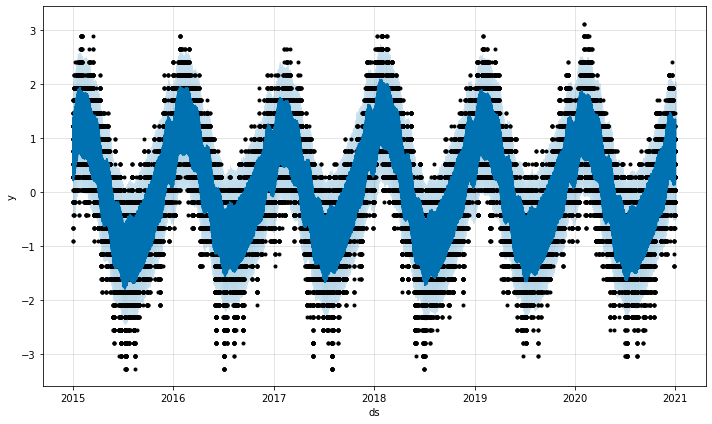

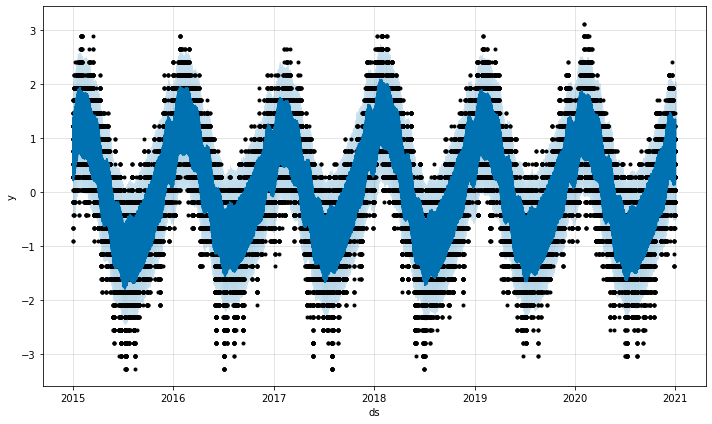

In [73]:
future_Month_Forcast = model.predict(model.make_future_dataframe(periods=60*30, freq='min'))
model.plot(future_Month_Forcast)

# Conclusion

* Comment on your model performance.
The model used time data as x and Temperature as y to fit the model. And the accuracy was only 56.7%.